# PONG

### Table of content
1. Algorithm learning process
2. Learning Outcomes
3. Video of an episode
4. Comparison of several policies

## 1. Algorithm learning process

In [1]:
import gym
import matplotlib.pyplot as plt
from IPython import display    
import time                    
import atari_py
import numpy as np             
from gym import wrappers       
import io                      
import base64                  
from IPython.display import HTML#
import random
import statistics
from numpy import load
from numpy import save

We initialize the positions of the elements we take into account as intervals.

In [2]:
def YG(observation):
    "Return Y state of raquet from Observation"
    ol142_92 = observation[34:194,142,0]==92
    ol142_101 = observation[34:194,142,0]==101 
    wG = round(np.mean(np.argwhere(np.logical_or(ol142_92,ol142_101)))) 
    
    #print(wG)
    yG160 = int(wG)+34    
    for i in interval_YG:
        if (yG160>=i) and (yG160<i+16):
            state=interval_YG.index(i)
            state=int(state)+1
    return state

In [3]:
def YB(observation):
    "Return Y state of ball from Observation"
    oball_236 = observation[34:194,:,0]== 236 
    oball_101 = observation[34:194,:,0]== 101 
    oball = np.logical_or(oball_236,oball_101)


    if np.sum(np.sum(oball, axis=0))==0: 
        return 5 

    ball1 = np.sum(oball, axis=1) 
    wB160 = int(round(np.mean(np.argwhere(ball1)))+34)  
    for i in interval_YG:
        if(wB160>=i) and (wB160<i+16):
            state1=interval_YG.index(i)
            state1=int(state1)+1
    return state1


In [35]:
def XB(observation):
    "Return Y state of ball from Observation"
    oball_236 = observation[34:194,:,0]== 236
    oball_101 = observation[34:194,:,0]== 101 
    oball = np.logical_or(oball_236,oball_101)
    
    if np.sum(np.sum(oball, axis=0))==0:
        return 5 
    

    ball1 = np.sum(oball, axis=0)
    wB160 = int(round(np.mean(np.argwhere(ball1))))
    if wB160<63:
     state= 1
    if wB160>=143:
        state= 10
    else:
        for i in interval_XB:
            #print(i)
            if(wB160>=i) and (wB160<i+10):
                state=interval_XB.index(i)
                state=int(state)+1
    return state

In [5]:
def XB_precise(observation):
    "Return Y state of ball from Observation"
    oball_236 = observation[34:194,:,0]== 236
    oball_101 = observation[34:194,:,0]== 101 
    oball = np.logical_or(oball_236,oball_101)

    # check if ball not there yet
    if np.sum(np.sum(oball, axis=0))==0:
        return 75 
    

    ball1 = np.sum(oball, axis=0)
    wB160 = int(round(np.mean(np.argwhere(ball1))))
    return wB160

We initialize the Q table

In [94]:
Q_table = np.zeros([3,11,11,11])
cum_rewardss=[]

We initialize the parameters of the episodes:
- The version of the game
- The length
- The number of episodes

In [70]:
# define the game length 
n_epi = 1000
L = 1500#1500

env = gym.make('Pong-v0')
#env = gym.make('PongNoFrameskip-v4')
env.unwrapped.get_action_meanings()
#noop: rester
#right=monter
#left

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [123]:
env = gym.make('Pong-v0')
#env = gym.make('PongNoFrameskip-v4')

alpha=0.5
interval_YG=[34,50,66,82,98,114,130,146,162,178]
interval_XB=[0,62,72,82,92,102,112,122,132,142]
random_action=[1,2,3]
cum_hitss=[]

L=1500
n_epi=1

for i in range(n_epi):
    
    if i%20==0:
        print("Welcome to the epiosde n°:"+str(i+1))
    env.reset()
    cum_reward =0
    cum_bal_hits=0
    cum_rewards = np.zeros(L)
    observation = env.reset()
    ball_Xposition=[]
    ball_XPrecise=[]
    Y_GPosition=[]
    ball_Yposition=[]
    actions=[]
    xff=0
    time=-1
    
    for t in range(L): 
        time=time+1 
        bal_hits=0
        yg=YG(observation)
        yb=YB(observation)
        xb=XB(observation)
        xb_precise=XB_precise(observation)
    
        if xff==1:#
        
            action = random.choice(random_action)
            #print('EXPLORE with action ' + str(action))
            observation, reward, done, info = env.step(action) 
            cum_reward += reward
            cum_rewards[t]=reward
            ball_Xposition.append(xb)
            ball_XPrecise.append(xb_precise)
            #print(ball_Xposition)
            Y_GPosition.append(yg)
            ball_Yposition.append(yb)
            actions.append(action)
            
    
        else:
            if Q_table[0,yg,yb,xb]==Q_table[1,yg,yb,xb]==Q_table[2,yg,yb,xb]:
                #print("pas de préférence")
                action = random.choice(random_action)
            elif (Q_table[0,yg,yb,xb]> Q_table[1,yg,yb,xb]) and (Q_table[0,yg,yb,xb]> Q_table[2,yg,yb,xb]):
                action=1
            elif (Q_table[1,yg,yb,xb]> Q_table[0,yg,yb,xb]) and (Q_table[1,yg,yb,xb]> Q_table[2,yg,yb,xb]):
                action=2
            elif (Q_table[2,yg,yb,xb]> Q_table[0,yg,yb,xb]) and (Q_table[2,yg,yb,xb]> Q_table[1,yg,yb,xb]):
                action=3

            #print("Ceci est la valeur d'action : "+str(action) )
            observation, reward, done, info = env.step(action)
            
            ball_Xposition.append(xb)
            ball_XPrecise.append(xb_precise)
            #print(ball_Xposition)
            Y_GPosition.append(yg)
            ball_Yposition.append(yb)
            actions.append(action)
            
            touched=0
            #if (ball_XPrecise[t]>=137 and ball_XPrecise[t]<=142) and ball_XPrecise[t]<ball_XPrecise[t-1]:
            if (ball_Xposition[t]==8) and ball_Xposition[t]<ball_Xposition[t-1]:
                #print("on a touché")
                touched=1
                bal_hits=1
            cum_reward +=reward
            cum_bal_hits+=bal_hits
            
            if touched==1:
                zs=time-35#-35
                ze=time
                for z in range(zs,ze):
                    action=actions[z]
                    action=action-1
                    yg=Y_GPosition[z]
                    yb=ball_Yposition[z]
                    xb=ball_Xposition[z]
                    Q_table[action,yg,yb,xb]= Q_table[action,yg,yb,xb]+alpha*(10+(Q_table[actions[z+1]-1,Y_GPosition[z+1],ball_Yposition[z+1],ball_Xposition[z+1]])-Q_table[action,yg,yb,xb])
                    #Q_table[action,yg,yb,xb]= Q_table[action,yg,yb,xb]+alpha*(10+1*max(Q_table[0,Y_GPosition[z+1],ball_Yposition[z+1],ball_Xposition[z+1]],Q_table[1,Y_GPosition[z+1],ball_Yposition[z+1],ball_Xposition[z+1]],Q_table[2,Y_GPosition[z+1],ball_Yposition[z+1],ball_Xposition[z+1]])-Q_table[action,yg,yb,xb])
                
                
            cum_rewards[t] = cum_reward
            if done:
                break #if the game is over
    env.close() # was env.render(close=True) instead
    cum_rewardss.append(cum_reward)
    cum_hitss.append(cum_bal_hits)

Welcome to the epiosde n°:1


## 2. Learning Outcomes

We want to see the score evolution

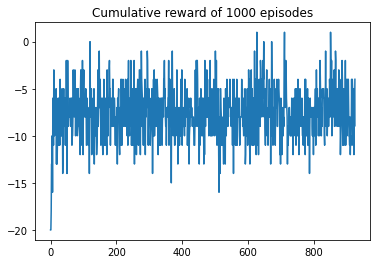

-8.18
-7.71
-7.079207920792079
-7.574257425742574
-7.653465346534653
-7.97979797979798
-6.881188118811881
-8.049504950495049
-6.7227722772277225
-7.884615384615385


In [102]:
plt.plot(cum_rewardss)
plt.title("Cumulative reward of 1000 episodes")
plt.show()
print(statistics.mean(cum_rewardss[1:101]))
print(statistics.mean(cum_rewardss[101:201]))
print(statistics.mean(cum_rewardss[200:301]))
print(statistics.mean(cum_rewardss[300:401]))
print(statistics.mean(cum_rewardss[400:501]))
print(statistics.mean(cum_rewardss[500:599]))
print(statistics.mean(cum_rewardss[600:701]))
print(statistics.mean(cum_rewardss[700:801]))
print(statistics.mean(cum_rewardss[800:901]))
print(statistics.mean(cum_rewardss[900:999]))

In [12]:
save('Q_table_cas_3actionsSARSA_LR0.7',Q_table)

We can the number of ball touched at each episode. The values are not 100% reliable

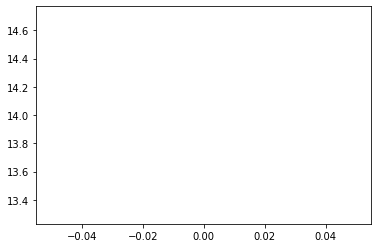

StatisticsError: mean requires at least one data point

In [103]:
plt.plot(cum_hitss)
plt.show()
print(statistics.mean(cum_hitss[1:101]))
print(statistics.mean(cum_hitss[499:599]))
print(statistics.mean(cum_hitss[599:699]))
print(statistics.mean(cum_hitss[900:999]))

We want to see how full of zeros the table is.

In [104]:
#Q_table = np.zeros([3,14,14,10])
list_zero=0
for k in range(10):
    for j in range (10):
        #print("""""")
        for l in range (10):
            
            for i in range (3):
                if Q_table[i,l,j,k]==0:
                    list_zero=list_zero+1
                #else:
                    #print(i)
                    #print(l)
                    #print(j)
                    #print(k)
                    #print(Q_table[i,l,j,k])
                    
print("liste de zéros: "+str(list_zero))
a=3*10*10*10
print("ceci est la valeur de a, nombre d'états possibles : "+str(a))
print("la liste est donc composé à : "+str(list_zero/a)+" % de 0")

liste de zéros: 2148
ceci est la valeur de a, nombre d'états possibles : 3000
la liste est donc composé à : 0.716 % de 0


Allows us to save a Q table via the numpy library

In [83]:
Q_table=load('Q_table_cas_3actionsSARSA.npy')

## 3. Video of an épisode

Allows us to watch an episode in which only what we've learned in the previous 1000 episodes is exploited.

In [135]:
frames=[]
cum_reward=0
cum_ball_hits=0
#env = gym.make('Pong-v0')
env = gym.make('PongNoFrameskip-v4')
env = wrappers.Monitor(env, "./gym-results", force=True)
env.reset()
xff=1
L=5000
for t in range(L): 
    #print("episode n°"+str(t))
    bal_hits=0
    yg=YG(observation)
    yb=YB(observation)
    xb=XB(observation)#XB(observation)

    
    if xff==2:
        # explore, reward is -1
        action = random.choice(random_action)
        observation, reward, done, info = env.step(action) # same as before, but we keep track of the observation and reward
        cum_reward += reward
        frames.append(env.render(mode = 'rgb_array'))
    
    else:
        #print("exploitation")
        if Q_table[0,yg,yb,xb]==Q_table[1,yg,yb,xb]==Q_table[2,yg,yb,xb]:
            action = random.choice(random_action)
            ##print("Nous avons pris l'action:"+str(action))
        elif (Q_table[0,yg,yb,xb]> Q_table[1,yg,yb,xb]) and (Q_table[0,yg,yb,xb]> Q_table[2,yg,yb,xb]):
            action=1
        elif (Q_table[1,yg,yb,xb]> Q_table[0,yg,yb,xb]) and (Q_table[1,yg,yb,xb]> Q_table[2,yg,yb,xb]):
            action=2
        elif (Q_table[2,yg,yb,xb]> Q_table[0,yg,yb,xb]) and (Q_table[2,yg,yb,xb]> Q_table[1,yg,yb,xb]):
            action=3
        
        observation, reward, done, info = env.step(action)
        frames.append(env.render(mode = 'rgb_array'))
        cum_reward +=reward
        cum_bal_hits+=bal_hits
        if done:
            break #if the game is over
print("Cela nous donne un reward total de"+str(cum_reward))
env.close() 

Cela nous donne un reward total de-9.0


In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

## 4. Comparison policies

Allows us to load the different Q tables we have trained. The parameters of this ones are different in order to compare it

In [41]:
Q_table=np.load('Q_table_cas_GagnantSARSA.npy') #500

In [42]:
Q_table2=np.load('Q_table_cas_3actionsSARSA_epi=1000.npy') #1000

In [43]:
Q_table3=np.load('Q_table_cas_3actionsSARSA_epi=1500.npy') #1500

Policy in which the agent plays completely randomly

In [110]:
PolicyR_t = 2*np.ones(5000,dtype='int')
for t in range(5000):
    PolicyR_t[t] = np.random.randint(3)+1

In [129]:
nepi = 50
npol = 2
L=5000


all_rewards = np.zeros([nepi,npol])
                        # tableaux avec tout

#env = gym.make('Pong-v0')
env = gym.make('PongNoFrameskip-v4')



episode_id = True

for p in range(npol): #qui va tester les polituqes une par une
    
    print("We work on policy n°"+str(p+1))

    for i in range(nepi):
        
        episode_id = True
        
        env.reset()
        cum_reward = 0
        cum_rewards = np.zeros(L)
        t=0

        for t in range(L):

            if p==0 :
                action = random.choice(random_action) #env.action_space.sample()
                observation, reward, done, info = env.step(action)
                cum_reward += reward # cum_reward = cum_reward + reward
                cum_rewards[t] = cum_reward
                all_rewards[i,p] = cum_reward
                if t == L-1:
                    done = 1
                if done:
                    break #if the game is over
            elif p==1:
                yg=YG(observation)
                yb=YB(observation)
                xb=XB(observation)
                if Q_table[0,yg,yb,xb]==Q_table[1,yg,yb,xb]==Q_table[2,yg,yb,xb]:
                #print("pas de préférence")
                    action = random.choice(random_action)
                #print("Nous avons pris l'action:"+str(action))
                elif (Q_table[0,yg,yb,xb]> Q_table[1,yg,yb,xb]) and (Q_table[0,yg,yb,xb]> Q_table[2,yg,yb,xb]):
                    action=1
                elif (Q_table[1,yg,yb,xb]> Q_table[0,yg,yb,xb]) and (Q_table[1,yg,yb,xb]> Q_table[2,yg,yb,xb]):
                    action=2
                elif (Q_table[2,yg,yb,xb]> Q_table[0,yg,yb,xb]) and (Q_table[2,yg,yb,xb]> Q_table[1,yg,yb,xb]):
                    action=3
            #print("on a pris l'action 3")
                observation, reward, done, info = env.step(action)
                cum_reward += reward
                cum_rewards[t]=cum_reward
                all_rewards[i,p]=cum_reward
                if t==L-1:
                    done=1
                if done: #21 points d'un côté
                    break
                    
            elif p==2:
                yg=YG(observation)
                yb=YB(observation)
                xb=XB(observation)
                if Q_table2[0,yg,yb,xb]==Q_table2[1,yg,yb,xb]==Q_table2[2,yg,yb,xb]:
                #print("pas de préférence")
                    action = random.choice(random_action)
                #print("Nous avons pris l'action:"+str(action))
                elif (Q_table2[0,yg,yb,xb]> Q_table2[1,yg,yb,xb]) and (Q_table2[0,yg,yb,xb]> Q_table2[2,yg,yb,xb]):
                    action=1
                elif (Q_table2[1,yg,yb,xb]> Q_table2[0,yg,yb,xb]) and (Q_table2[1,yg,yb,xb]> Q_table2[2,yg,yb,xb]):
                    action=2
                elif (Q_table2[2,yg,yb,xb]> Q_table2[0,yg,yb,xb]) and (Q_table2[2,yg,yb,xb]> Q_table2[1,yg,yb,xb]):
                    action=3
                observation, reward, done, info = env.step(action)
                cum_reward += reward
                cum_rewards[t]=cum_reward
                all_rewards[i,p]=cum_reward
                if t==L-1:
                    done=1
                if done: 
                    break
                    
            elif p==3:
                yg=YG(observation)
                yb=YB(observation)
                xb=XB(observation)
                if Q_table3[0,yg,yb,xb]==Q_table3[1,yg,yb,xb]==Q_table3[2,yg,yb,xb]:
                #print("pas de préférence")
                    action = random.choice(random_action)
                #print("Nous avons pris l'action:"+str(action))
                elif (Q_table3[0,yg,yb,xb]> Q_table3[1,yg,yb,xb]) and (Q_table3[0,yg,yb,xb]> Q_table3[2,yg,yb,xb]):
                    action=1
                elif (Q_table3[1,yg,yb,xb]> Q_table3[0,yg,yb,xb]) and (Q_table3[1,yg,yb,xb]> Q_table3[2,yg,yb,xb]):
                    action=2
                elif (Q_table3[2,yg,yb,xb]> Q_table3[0,yg,yb,xb]) and (Q_table3[2,yg,yb,xb]> Q_table3[1,yg,yb,xb]):
                    action=3
            #print("on a pris l'action 3")
                observation, reward, done, info = env.step(action)
                cum_reward += reward
                cum_rewards[t]=cum_reward
                all_rewards[i,p]=cum_reward
                if t==L-1:
                    done=1
                if done: #21 points d'un côté
                    break
        env.close()
print("les résultats sont là")

We work on policy n°1
We work on policy n°2
les résultats sont là


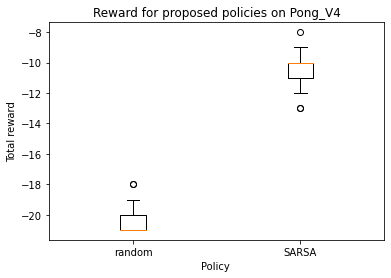

In [130]:
plt.boxplot(all_rewards)
plt.title('Reward for proposed policies on Pong_V4')
plt.xlabel('Policy ')
plt.ylabel('Total reward')
plt.xticks([1, 2], ['random','SARSA'])
plt.show()

In [131]:
np.mean(all_rewards,0)

array([-20.44, -10.48])

In [132]:
np.std(all_rewards,0)

array([0.80399005, 1.04383907])

(array([[44.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  8., 14., 21.,  7.]]),
 array([-21. , -19.7, -18.4, -17.1, -15.8, -14.5, -13.2, -11.9, -10.6,
         -9.3,  -8. ]),
 <a list of 2 Lists of Patches objects>)

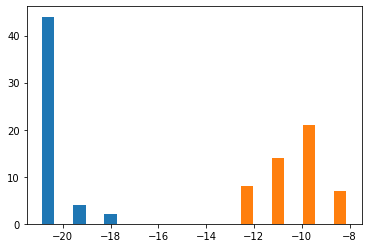

In [133]:
plt.hist(all_rewards)